# Synthetic data generation using Variational Autoencoder

# Data Preprocessing

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K

In [28]:
# Loading the credit card dataset.
data = pd.read_csv("/content/drive/MyDrive/card_transaction.v1.csv")

# Displaying the first few rows of the dataframe.
print(data.head())
print(data.shape[0])

   User  Card  Year  Month  Day   Time   Amount           Use Chip  \
0     0     0  2002      9    1  06:21  $134.09  Swipe Transaction   
1     0     0  2002      9    1  06:42   $38.48  Swipe Transaction   
2     0     0  2002      9    2  06:22  $120.34  Swipe Transaction   
3     0     0  2002      9    2  17:45  $128.95  Swipe Transaction   
4     0     0  2002      9    3  06:23  $104.71  Swipe Transaction   

   Merchant Name  Merchant City Merchant State      Zip     MCC Errors?  \
0   3.527213e+18       La Verne             CA  91750.0  5300.0     NaN   
1  -7.276121e+17  Monterey Park             CA  91754.0  5411.0     NaN   
2  -7.276121e+17  Monterey Park             CA  91754.0  5411.0     NaN   
3   3.414527e+18  Monterey Park             CA  91754.0  5651.0     NaN   
4   5.817218e+18       La Verne             CA  91750.0  5912.0     NaN   

  Is Fraud?  
0        No  
1        No  
2        No  
3        No  
4        No  
2555190


In [29]:
# Find columns with missing values and their counts
missing_values = data.isnull().sum()
print("\nColumns with missing values and their counts:")
print(missing_values[missing_values > 0])


Columns with missing values and their counts:
Amount                  1
Use Chip                1
Merchant Name           1
Merchant City           1
Merchant State     321041
Zip                338205
MCC                     1
Errors?           2515428
Is Fraud?               1
dtype: int64


**Data Preprocessing**

The amount column have dollar sign appended to it. To provide the input to model we need to convert it into numerical value and hence we are removing dollar sign from each entry of the column. The same can be verified from the output of the next step.

In [30]:
# Remove dollar sign from the 'Amount' column and convert to float
data['Amount'] = data['Amount'].replace({'\$': ''}, regex=True).astype(float)

# Verify the data
print(data.head())
print(data.shape[0])

   User  Card  Year  Month  Day   Time  Amount           Use Chip  \
0     0     0  2002      9    1  06:21  134.09  Swipe Transaction   
1     0     0  2002      9    1  06:42   38.48  Swipe Transaction   
2     0     0  2002      9    2  06:22  120.34  Swipe Transaction   
3     0     0  2002      9    2  17:45  128.95  Swipe Transaction   
4     0     0  2002      9    3  06:23  104.71  Swipe Transaction   

   Merchant Name  Merchant City Merchant State      Zip     MCC Errors?  \
0   3.527213e+18       La Verne             CA  91750.0  5300.0     NaN   
1  -7.276121e+17  Monterey Park             CA  91754.0  5411.0     NaN   
2  -7.276121e+17  Monterey Park             CA  91754.0  5411.0     NaN   
3   3.414527e+18  Monterey Park             CA  91754.0  5651.0     NaN   
4   5.817218e+18       La Verne             CA  91750.0  5912.0     NaN   

  Is Fraud?  
0        No  
1        No  
2        No  
3        No  
4        No  
2555190


**Data Preprocessing**

There is a entry having most of the cells empty and hence we are removing it. The same can be verified from the output of the next step as removing that entry makes few feature free of null entry.

In [31]:
# Find the index of the row containing the problematic entry
problematic_index = data[pd.to_datetime(data['Time'], errors='coerce').isnull()].index

# Remove the row with the problematic entry
data = data.drop(problematic_index)

# Verify that the row has been removed
print(data.head())
print(data.shape[0])

<ipython-input-31-385e23164f10>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  problematic_index = data[pd.to_datetime(data['Time'], errors='coerce').isnull()].index


   User  Card  Year  Month  Day   Time  Amount           Use Chip  \
0     0     0  2002      9    1  06:21  134.09  Swipe Transaction   
1     0     0  2002      9    1  06:42   38.48  Swipe Transaction   
2     0     0  2002      9    2  06:22  120.34  Swipe Transaction   
3     0     0  2002      9    2  17:45  128.95  Swipe Transaction   
4     0     0  2002      9    3  06:23  104.71  Swipe Transaction   

   Merchant Name  Merchant City Merchant State      Zip     MCC Errors?  \
0   3.527213e+18       La Verne             CA  91750.0  5300.0     NaN   
1  -7.276121e+17  Monterey Park             CA  91754.0  5411.0     NaN   
2  -7.276121e+17  Monterey Park             CA  91754.0  5411.0     NaN   
3   3.414527e+18  Monterey Park             CA  91754.0  5651.0     NaN   
4   5.817218e+18       La Verne             CA  91750.0  5912.0     NaN   

  Is Fraud?  
0        No  
1        No  
2        No  
3        No  
4        No  
2555189


In [32]:
# Find columns with missing values and their counts
missing_values = data.isnull().sum()
print("\nColumns with missing values and their counts:")
print(missing_values[missing_values > 0])


Columns with missing values and their counts:
Merchant State     321040
Zip                338204
Errors?           2515427
dtype: int64


**Data Preprocessing**

The time column have hh:mm format. To provide the input to model we need to convert it into numerical value and hence we areconverting it into minutes. The same can be verified from the output of the next step.

In [33]:
# Convert hh:mm format time to numerical values
# Convert hh:mm format time to numerical values
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour * 60 + pd.to_datetime(data['Time'], format='%H:%M').dt.minute

# Verify the data
print(data.head())
print(data.shape[0])

   User  Card  Year  Month  Day  Time  Amount           Use Chip  \
0     0     0  2002      9    1   381  134.09  Swipe Transaction   
1     0     0  2002      9    1   402   38.48  Swipe Transaction   
2     0     0  2002      9    2   382  120.34  Swipe Transaction   
3     0     0  2002      9    2  1065  128.95  Swipe Transaction   
4     0     0  2002      9    3   383  104.71  Swipe Transaction   

   Merchant Name  Merchant City Merchant State      Zip     MCC Errors?  \
0   3.527213e+18       La Verne             CA  91750.0  5300.0     NaN   
1  -7.276121e+17  Monterey Park             CA  91754.0  5411.0     NaN   
2  -7.276121e+17  Monterey Park             CA  91754.0  5411.0     NaN   
3   3.414527e+18  Monterey Park             CA  91754.0  5651.0     NaN   
4   5.817218e+18       La Verne             CA  91750.0  5912.0     NaN   

  Is Fraud?  
0        No  
1        No  
2        No  
3        No  
4        No  
2555189


**Data Preprocessing**

Here we are tring to find why merchant stste and zip has empty values. We find that all online yransaction have empty address values. From the finding we decided to put value ONLINE in the column having null values.

In [35]:
n = 5  # Number of rows to display
column_name = 'Merchant State'

# Assuming 'df' is your DataFrame
rows_with_null = data[data[column_name].isnull()].head(n)

print(rows_with_null)

     User  Card  Year  Month  Day  Time  Amount            Use Chip  \
11      0     0  2002      9    5  1241   53.91  Online Transaction   
24      0     0  2002      9    9  1202  144.90  Online Transaction   
85      0     0  2002      9   30   381  127.32  Online Transaction   
99      0     0  2002     10    6   374  139.39  Online Transaction   
106     0     0  2002     10    9   496   53.09  Online Transaction   

     Merchant Name Merchant City Merchant State  Zip     MCC Errors? Is Fraud?  
11   -9.092677e+18        ONLINE            NaN  NaN  4900.0     NaN        No  
24   -8.338382e+18        ONLINE            NaN  NaN  4899.0     NaN        No  
85   -7.421093e+18        ONLINE            NaN  NaN  5311.0     NaN        No  
99   -7.421093e+18        ONLINE            NaN  NaN  5311.0     NaN        No  
106  -4.956618e+18        ONLINE            NaN  NaN  5193.0     NaN        No  


**Data Preprocessing**

Put value ONLINE in merchant column having null values.

Put value NO_ERROR in errors column having null values.

Put value mean in zip column having null values.

In [36]:
# Handle missing values
categorical_columns = ['Merchant State']
data[categorical_columns] = data[categorical_columns].fillna('ONLINE')
categorical_columns = ['Errors?']
data[categorical_columns] = data[categorical_columns].fillna('NO_ERROR')
data['Zip'].fillna(data['Zip'].mean(), inplace=True)
#data['Zip'].fillna(-1, inplace=True)

In [37]:
# Verify the data
print(data.head())
print(data.shape[0])

   User  Card  Year  Month  Day  Time  Amount           Use Chip  \
0     0     0  2002      9    1   381  134.09  Swipe Transaction   
1     0     0  2002      9    1   402   38.48  Swipe Transaction   
2     0     0  2002      9    2   382  120.34  Swipe Transaction   
3     0     0  2002      9    2  1065  128.95  Swipe Transaction   
4     0     0  2002      9    3   383  104.71  Swipe Transaction   

   Merchant Name  Merchant City Merchant State      Zip     MCC   Errors?  \
0   3.527213e+18       La Verne             CA  91750.0  5300.0  NO_ERROR   
1  -7.276121e+17  Monterey Park             CA  91754.0  5411.0  NO_ERROR   
2  -7.276121e+17  Monterey Park             CA  91754.0  5411.0  NO_ERROR   
3   3.414527e+18  Monterey Park             CA  91754.0  5651.0  NO_ERROR   
4   5.817218e+18       La Verne             CA  91750.0  5912.0  NO_ERROR   

  Is Fraud?  
0        No  
1        No  
2        No  
3        No  
4        No  
2555189


In [39]:
# Verifying data

# Get number of rows and columns
num_rows, num_cols = data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Get column details
column_details = []
for col in data.columns:
    col_type = data[col].dtype
    num_unique = data[col].nunique()
    num_missing = data[col].isnull().sum()
    column_details.append((col, col_type, col_type, num_unique, num_missing))  # added col_type for datatype

# Print column details
print("\nColumn Details:")
for col, col_type, data_type, num_unique, num_missing in column_details:  # unpacking data_type
    print(f"Column: {col}, Type: {col_type}, Data Type: {data_type}, Unique Values: {num_unique}, Missing Values: {num_missing}")  # printing data_type


Number of rows: 2555189
Number of columns: 15

Column Details:
Column: User, Type: int64, Data Type: int64, Unique Values: 216, Missing Values: 0
Column: Card, Type: int64, Data Type: int64, Unique Values: 9, Missing Values: 0
Column: Year, Type: int64, Data Type: int64, Unique Values: 26, Missing Values: 0
Column: Month, Type: int64, Data Type: int64, Unique Values: 12, Missing Values: 0
Column: Day, Type: int64, Data Type: int64, Unique Values: 31, Missing Values: 0
Column: Time, Type: int64, Data Type: int64, Unique Values: 1440, Missing Values: 0
Column: Amount, Type: float64, Data Type: float64, Unique Values: 45236, Missing Values: 0
Column: Use Chip, Type: object, Data Type: object, Unique Values: 3, Missing Values: 0
Column: Merchant Name, Type: float64, Data Type: float64, Unique Values: 22574, Missing Values: 0
Column: Merchant City, Type: object, Data Type: object, Unique Values: 7901, Missing Values: 0
Column: Merchant State, Type: object, Data Type: object, Unique Values: 

In [40]:
data_original = data.copy()

**Data Preprocessing**

Label encoding the categorical values.

In [41]:
# Perform label encoding for categorical columns
label_encoder_mc = LabelEncoder()
label_encoder_ms = LabelEncoder()
label_encoder_uc = LabelEncoder()
label_encoder_er = LabelEncoder()
label_encoder_if = LabelEncoder()
#data['Merchant Name'] = label_encoder_mc.fit_transform(data['Merchant Name'])
data['Merchant City'] = label_encoder_mc.fit_transform(data['Merchant City'])
data['Merchant State'] = label_encoder_ms.fit_transform(data['Merchant State'])
data['Use Chip'] = label_encoder_uc.fit_transform(data['Use Chip'])
data['Errors?'] = label_encoder_er.fit_transform(data['Errors?'])
data['Is Fraud?'] = label_encoder_if.fit_transform(data['Is Fraud?'])

print(data.head())
print(data.shape[0])

   User  Card  Year  Month  Day  Time  Amount  Use Chip  Merchant Name  \
0     0     0  2002      9    1   381  134.09         2   3.527213e+18   
1     0     0  2002      9    1   402   38.48         2  -7.276121e+17   
2     0     0  2002      9    2   382  120.34         2  -7.276121e+17   
3     0     0  2002      9    2  1065  128.95         2   3.414527e+18   
4     0     0  2002      9    3   383  104.71         2   5.817218e+18   

   Merchant City  Merchant State      Zip     MCC  Errors?  Is Fraud?  
0           3696              16  91750.0  5300.0       19          0  
1           4600              16  91754.0  5411.0       19          0  
2           4600              16  91754.0  5411.0       19          0  
3           4600              16  91754.0  5651.0       19          0  
4           3696              16  91750.0  5912.0       19          0  
2555189


**Data Preprocessing**

Applying min-max scaling.

In [47]:
# Standardize numerical features
# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
data_scaled = scaler.fit_transform(data)

# Print the first few rows of the synthetic data
print(data_scaled[:5])  # Print the first 5 rows

# Print the total number of transactions generated
print("Total number of transactions generated:", data_scaled.shape[0])

[[0.         0.         0.28       0.72727273 0.         0.2647672
  0.08662195 1.         0.69121062 0.4678481  0.11111111 0.91733298
  0.46664933 0.95       0.        ]
 [0.         0.         0.28       0.72727273 0.         0.27936067
  0.07356083 1.         0.46053605 0.58227848 0.11111111 0.91737342
  0.48108178 0.95       0.        ]
 [0.         0.         0.28       0.72727273 0.03333333 0.26546213
  0.08474359 1.         0.46053605 0.58227848 0.11111111 0.91737342
  0.48108178 0.95       0.        ]
 [0.         0.         0.28       0.72727273 0.03333333 0.74009729
  0.08591978 1.         0.68510138 0.58227848 0.11111111 0.91737342
  0.51228709 0.95       0.        ]
 [0.         0.         0.28       0.72727273 0.06666667 0.26615705
  0.0826084  1.         0.81536284 0.4678481  0.11111111 0.91733298
  0.54622286 0.95       0.        ]]
Total number of transactions generated: 2555189


**Data Preprocessing**

Splitting the dataset in train and test.

In [50]:
# Split data into training and testing sets
data_train, data_test = train_test_split(data_scaled, test_size=0.2, random_state=42)

# Verify the data
# Print the first few rows of the synthetic data
print(data_train[:5])  # Print the first 5 rows
print(data_test[:5])
print(data_train.shape[0])
print(data_test.shape[0])

[[0.84651163 0.         0.76       1.         0.3        0.15079917
  0.07141335 1.         0.99187876 0.12962025 0.25694444 0.29428771
  0.53335067 0.95       0.        ]
 [0.72093023 0.5        0.76       1.         0.23333333 0.35441279
  0.06869894 1.         0.68510138 0.62493671 0.34027778 0.6036067
  0.51228709 0.95       0.        ]
 [0.37674419 0.25       0.48       0.18181818 0.9        0.23974983
  0.08130242 1.         0.14458855 0.54075949 0.70138889 0.15208184
  0.53322065 0.95       0.        ]
 [0.04651163 0.         1.         0.09090909 0.06666667 0.59694232
  0.0790074  0.         0.07780435 0.28708861 0.11111111 0.95653361
  0.50838643 0.95       0.        ]
 [0.34418605 0.125      0.8        0.63636364 0.36666667 0.37039611
  0.06878091 0.         0.60372223 0.32101266 0.875      0.7483599
  0.46664933 0.95       0.        ]]
[[0.26976744 0.         0.84       0.36363636 0.         0.6504517
  0.0560094  1.         0.50610562 0.4135443  0.875      0.76879922
  0.49

# VAE model to train and generate synthetic dataset

In [51]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, Layer, ReLU, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define VAE model parameters
original_dim = data_scaled.shape[1]  # Number of features
latent_dim = 10  # Dimensionality of the latent space
intermediate_dim = 256  # Dimensionality of the hidden layer
batch_size = 32
epochs = 10

# Define custom layer for the VAE
class Sampling(Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim))
        return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Define encoder network
inputs = Input(shape=(original_dim,))
h = Dense(intermediate_dim)(inputs)
h = BatchNormalization()(h)
h = ReLU()(h)
z_mean = Dense(latent_dim)(h)
z_mean = ReLU()(z_mean)  # Applying ReLU activation to enforce positivity
z_log_var = Dense(latent_dim)(h)
z_log_var = ReLU()(z_log_var)  # Applying ReLU activation to enforce positivity
z = Sampling()([z_mean, z_log_var])
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')

# Define decoder network
latent_inputs = Input(shape=(latent_dim,))
h_decoded = Dense(intermediate_dim)(latent_inputs)
h_decoded = BatchNormalization()(h_decoded)
h_decoded = ReLU()(h_decoded)
outputs = Dense(original_dim, activation='sigmoid')(h_decoded)  # Changed activation function to 'sigmoid'
decoder = Model(latent_inputs, outputs, name='decoder')

# Define VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')

# Define loss function for VAE
reconstruction_loss = tf.keras.losses.mean_squared_error(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
kl_loss = tf.reduce_mean(kl_loss)
kl_loss *= -0.5
vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

# Train the VAE model
vae.fit(data_train, epochs=epochs, batch_size=batch_size, validation_data=(data_test, None))

Epoch 1/10
63880/63880 [==============================] - 301s 5ms/step - loss: 0.8666 - val_loss: 0.8589
Epoch 2/10
63880/63880 [==============================] - 291s 5ms/step - loss: 0.8621 - val_loss: 0.8583
Epoch 3/10
63880/63880 [==============================] - 277s 4ms/step - loss: 0.8621 - val_loss: 0.8570
Epoch 4/10
63880/63880 [==============================] - 267s 4ms/step - loss: 0.8619 - val_loss: 0.8572
Epoch 5/10
63880/63880 [==============================] - 276s 4ms/step - loss: 0.8618 - val_loss: 0.8581
Epoch 6/10
63880/63880 [==============================] - 292s 5ms/step - loss: 0.8617 - val_loss: 0.8581
Epoch 7/10
63880/63880 [==============================] - 276s 4ms/step - loss: 0.8619 - val_loss: 0.8569
Epoch 8/10
63880/63880 [==============================] - 290s 5ms/step - loss: 0.8621 - val_loss: 0.8571
Epoch 9/10
63880/63880 [==============================] - 282s 4ms/step - loss: 0.8619 - val_loss: 0.8578
Epoch 10/10
63880/63880 [=====================

In [55]:
# Define the number of samples you want to generate
num_samples = 2000000

# Generate random samples from a normal distribution to use as input to the VAE
random_samples = np.random.normal(size=(num_samples, original_dim))  # Assuming input_dim is the dimension of the input data expected by the VAE model

# Generate synthetic data using the VAE
synthetic_data = vae.predict(random_samples, batch_size=batch_size)

# Print the total number of transactions generated
print("Total number of transactions generated:", synthetic_data.shape[0])


62500/62500 [==============================] - 135s 2ms/step
Total number of transactions generated: 2000000


# Processing the generated synthetic dataset

In [67]:
# Print the first few rows of the synthetic data
print(synthetic_data[:5])  # Print the first 5 rows

# Print the total number of transactions generated
print("Total number of transactions generated:", synthetic_data.shape[0])

[[2.2797285e-01 1.9853087e-01 5.1918530e-01 4.7300094e-01 4.5164648e-01
  5.0235051e-01 7.1515933e-02 9.9992675e-01 5.3273356e-01 9.0256268e-01
  2.2291768e-02 9.4168389e-01 4.7265750e-01 9.5447832e-01 1.0180653e-05]
 [4.8393261e-01 1.5543911e-01 7.1816534e-01 4.9737334e-01 4.9325779e-01
  5.4092604e-01 7.5560071e-02 5.4003972e-01 4.5950612e-01 3.5543114e-01
  5.8460933e-01 4.7905532e-01 4.9014154e-01 9.4650686e-01 1.2858540e-03]
 [4.3391705e-01 1.9470477e-01 8.9142078e-01 4.6966410e-01 4.9726537e-01
  5.5523682e-01 7.5721294e-02 4.8612910e-03 4.9583721e-01 6.6722071e-01
  3.0186090e-01 6.3104278e-01 5.0353003e-01 9.4805348e-01 1.1717080e-03]
 [5.3387541e-01 1.4718652e-01 8.2030070e-01 4.6723989e-01 4.8865286e-01
  5.4116040e-01 7.4467637e-02 2.2230706e-01 4.2541391e-01 1.8271171e-01
  6.2052476e-01 4.6943399e-01 4.7402003e-01 9.4441932e-01 1.4361017e-03]
 [4.6906155e-01 1.7532396e-01 8.6616731e-01 4.7460109e-01 4.9413717e-01
  5.5946171e-01 7.4773706e-02 4.5657251e-02 4.8978540e-01 5.

In [70]:
# Inverse transform to get back original scale
synthetic_data = scaler.inverse_transform(synthetic_data)

In [71]:
# Print the first few rows of the synthetic data
print(synthetic_data[:5])  # Print the first 5 rows

# Print the total number of transactions generated
print("Total number of transactions generated:", synthetic_data.shape[0])

[[ 4.90141640e+01  1.58824694e+00  2.00797961e+03  6.20301008e+00
   1.45493946e+01  7.22882385e+02  2.35109291e+01  1.99985349e+00
   6.04081240e+17  7.13024512e+03  3.21001458e+00  9.41589609e+04
   5.34620898e+03  1.90895672e+01  1.01806527e-05]
 [ 1.04045509e+02  1.24351287e+00  2.01295410e+03  6.47110653e+00
   1.57977333e+01  7.78392578e+02  5.31148262e+01  1.08007944e+00
  -7.46609146e+17  2.80790601e+03  8.41837463e+01  4.83925039e+04
   5.48067871e+03  1.89301376e+01  1.28585403e-03]
 [ 9.32921677e+01  1.55763817e+00  2.01728552e+03  6.16630459e+00
   1.59179611e+01  7.98985779e+02  5.42950134e+01  9.72258206e-03
  -7.64770896e+16  5.27104346e+03  4.34679680e+01  6.34281680e+04
   5.58364941e+03  1.89610691e+01  1.17170799e-03]
 [ 1.14783211e+02  1.17749214e+00  2.01550757e+03  6.13963890e+00
   1.56595860e+01  7.78729797e+02  4.51179924e+01  4.44614112e-01
  -1.37544493e+18  1.44342249e+03  8.93555679e+01  4.74406953e+04
   5.35668799e+03  1.88883858e+01  1.43610174e-03]
 [ 1

In [73]:
# Convert synthetic_data numpy array to pandas DataFrame
synthetic_data_df = pd.DataFrame(synthetic_data, columns=data.columns)

In [75]:
# Display the first few rows of the dataframe
print(synthetic_data_df.head())
print(synthetic_data_df.shape[0])

         User      Card         Year     Month        Day        Time  \
0   49.014164  1.588247  2007.979614  6.203010  14.549395  722.882385   
1  104.045509  1.243513  2012.954102  6.471107  15.797733  778.392578   
2   93.292168  1.557638  2017.285522  6.166305  15.917961  798.985779   
3  114.783211  1.177492  2015.507568  6.139639  15.659586  778.729797   
4  100.848236  1.402592  2016.654175  6.220612  15.824116  805.065430   

      Amount  Use Chip  Merchant Name  Merchant City  Merchant State  \
0  23.510929  1.999853   6.040812e+17    7130.245117        3.210015   
1  53.114826  1.080079  -7.466091e+17    2807.906006       84.183746   
2  54.295013  0.009723  -7.647709e+16    5271.043457       43.467968   
3  45.117992  0.444614  -1.375445e+18    1443.422485       89.355568   
4  47.358486  0.091315  -1.881036e+17    4382.456055       64.940453   

            Zip          MCC    Errors?  Is Fraud?  
0  94158.960938  5346.208984  19.089567   0.000010  
1  48392.503906  5480.

In [76]:
# Convert each column to its respective data type to match the original data
synthetic_data_df['User'] = synthetic_data_df['User'].astype(int)
synthetic_data_df['Card'] = synthetic_data_df['Card'].astype(int)
synthetic_data_df['Year'] = synthetic_data_df['Year'].astype(int)
synthetic_data_df['Month'] = synthetic_data_df['Month'].astype(int)
synthetic_data_df['Day'] = synthetic_data_df['Day'].astype(int)
synthetic_data_df['Time'] = synthetic_data_df['Time'].astype(int)
synthetic_data_df['Amount'] = synthetic_data_df['Amount'].apply(lambda x: round(x, 2))
synthetic_data_df['Use Chip'] = synthetic_data_df['Use Chip'].astype(int)
#synthetic_data_df['Merchant Name'] = synthetic_data_df['Merchant Name'].astype(int)
synthetic_data_df['Merchant City'] = synthetic_data_df['Merchant City'].astype(int)
synthetic_data_df['Merchant State'] = synthetic_data_df['Merchant State'].astype(int)
synthetic_data_df['Zip'] = synthetic_data_df['Zip'].round().astype(float)
synthetic_data_df['MCC'] = synthetic_data_df['MCC'].round().astype(float)
synthetic_data_df['Errors?'] = synthetic_data_df['Errors?'].round(0).astype(int)
synthetic_data_df['Is Fraud?'] = synthetic_data_df['Is Fraud?'].round(0).astype(int)

In [77]:
# Display the first few rows of the dataframe
print(synthetic_data_df.head())
print(synthetic_data_df.shape[0])

   User  Card  Year  Month  Day  Time  Amount  Use Chip  Merchant Name  \
0    49     1  2007      6   14   722   23.51         1   6.040812e+17   
1   104     1  2012      6   15   778   53.11         1  -7.466091e+17   
2    93     1  2017      6   15   798   54.30         0  -7.647709e+16   
3   114     1  2015      6   15   778   45.12         0  -1.375445e+18   
4   100     1  2016      6   15   805   47.36         0  -1.881036e+17   

   Merchant City  Merchant State      Zip     MCC  Errors?  Is Fraud?  
0           7130               3  94159.0  5346.0       19          0  
1           2807              84  48393.0  5481.0       19          0  
2           5271              43  63428.0  5584.0       19          0  
3           1443              89  47441.0  5357.0       19          0  
4           4382              64  53118.0  5605.0       19          0  
2000000


In [80]:
# Reverse label encoding for categorical columns
synthetic_data_df['Merchant City'] = label_encoder_mc.inverse_transform(synthetic_data_df['Merchant City'])
synthetic_data_df['Merchant State'] = label_encoder_ms.inverse_transform(synthetic_data_df['Merchant State'])
synthetic_data_df['Use Chip'] = label_encoder_uc.inverse_transform(synthetic_data_df['Use Chip'])
synthetic_data_df['Errors?'] = label_encoder_er.inverse_transform(synthetic_data_df['Errors?'])
synthetic_data_df['Is Fraud?'] = label_encoder_if.inverse_transform(synthetic_data_df['Is Fraud?'])

In [82]:
# Display the first few rows of the dataframe
print(synthetic_data_df.head())
print(synthetic_data_df.shape[0])

   User  Card  Year  Month  Day  Time  Amount            Use Chip  \
0    49     1  2007      6   14   722   23.51  Online Transaction   
1   104     1  2012      6   15   778   53.11  Online Transaction   
2    93     1  2017      6   15   798   54.30    Chip Transaction   
3   114     1  2015      6   15   778   45.12    Chip Transaction   
4   100     1  2016      6   15   805   47.36    Chip Transaction   

   Merchant Name Merchant City Merchant State      Zip     MCC   Errors?  \
0   6.040812e+17     Tuba City             AZ  94159.0  5346.0  NO_ERROR   
1  -7.466091e+17   Green River             NC  48393.0  5481.0  NO_ERROR   
2  -7.647709e+16      Pacifica             HI  63428.0  5584.0  NO_ERROR   
3  -1.375445e+18    Columbiana             NM  47441.0  5357.0  NO_ERROR   
4  -1.881036e+17        Mcloud         Latvia  53118.0  5605.0  NO_ERROR   

  Is Fraud?  
0        No  
1        No  
2        No  
3        No  
4        No  
2000000


In [90]:
# Reverse the conversion of time to numerical values
synthetic_data_df['Time'] = (synthetic_data_df['Time'] // 60).astype(str).str.zfill(2) + ':' + (synthetic_data_df['Time'] % 60).astype(str).str.zfill(2)

# Reverse the removal of dollar sign and conversion to float for amount column
synthetic_data_df['Amount'] = '$' + synthetic_data_df['Amount'].astype(str)

In [91]:
# Display the first few rows of the dataframe
print(synthetic_data_df.head())
print(synthetic_data_df.shape[0])

   User  Card  Year  Month  Day   Time  Amount            Use Chip  \
0    49     1  2007      6   14  12:02  $23.51  Online Transaction   
1   104     1  2012      6   15  12:58  $53.11  Online Transaction   
2    93     1  2017      6   15  13:18   $54.3    Chip Transaction   
3   114     1  2015      6   15  12:58  $45.12    Chip Transaction   
4   100     1  2016      6   15  13:25  $47.36    Chip Transaction   

   Merchant Name Merchant City Merchant State      Zip     MCC   Errors?  \
0   6.040812e+17     Tuba City             AZ  94159.0  5346.0  NO_ERROR   
1  -7.466091e+17   Green River             NC  48393.0  5481.0  NO_ERROR   
2  -7.647709e+16      Pacifica             HI  63428.0  5584.0  NO_ERROR   
3  -1.375445e+18    Columbiana             NM  47441.0  5357.0  NO_ERROR   
4  -1.881036e+17        Mcloud         Latvia  53118.0  5605.0  NO_ERROR   

  Is Fraud?  
0        No  
1        No  
2        No  
3        No  
4        No  
2000000


**Generated data summary:**



*   From the above first few sample of the generated data we can observe that the samples looks quite similar in structure to the original data.
*   The structure of the **time and amount column** is also the same as given in the original dataset.






# Plots and Evaluation

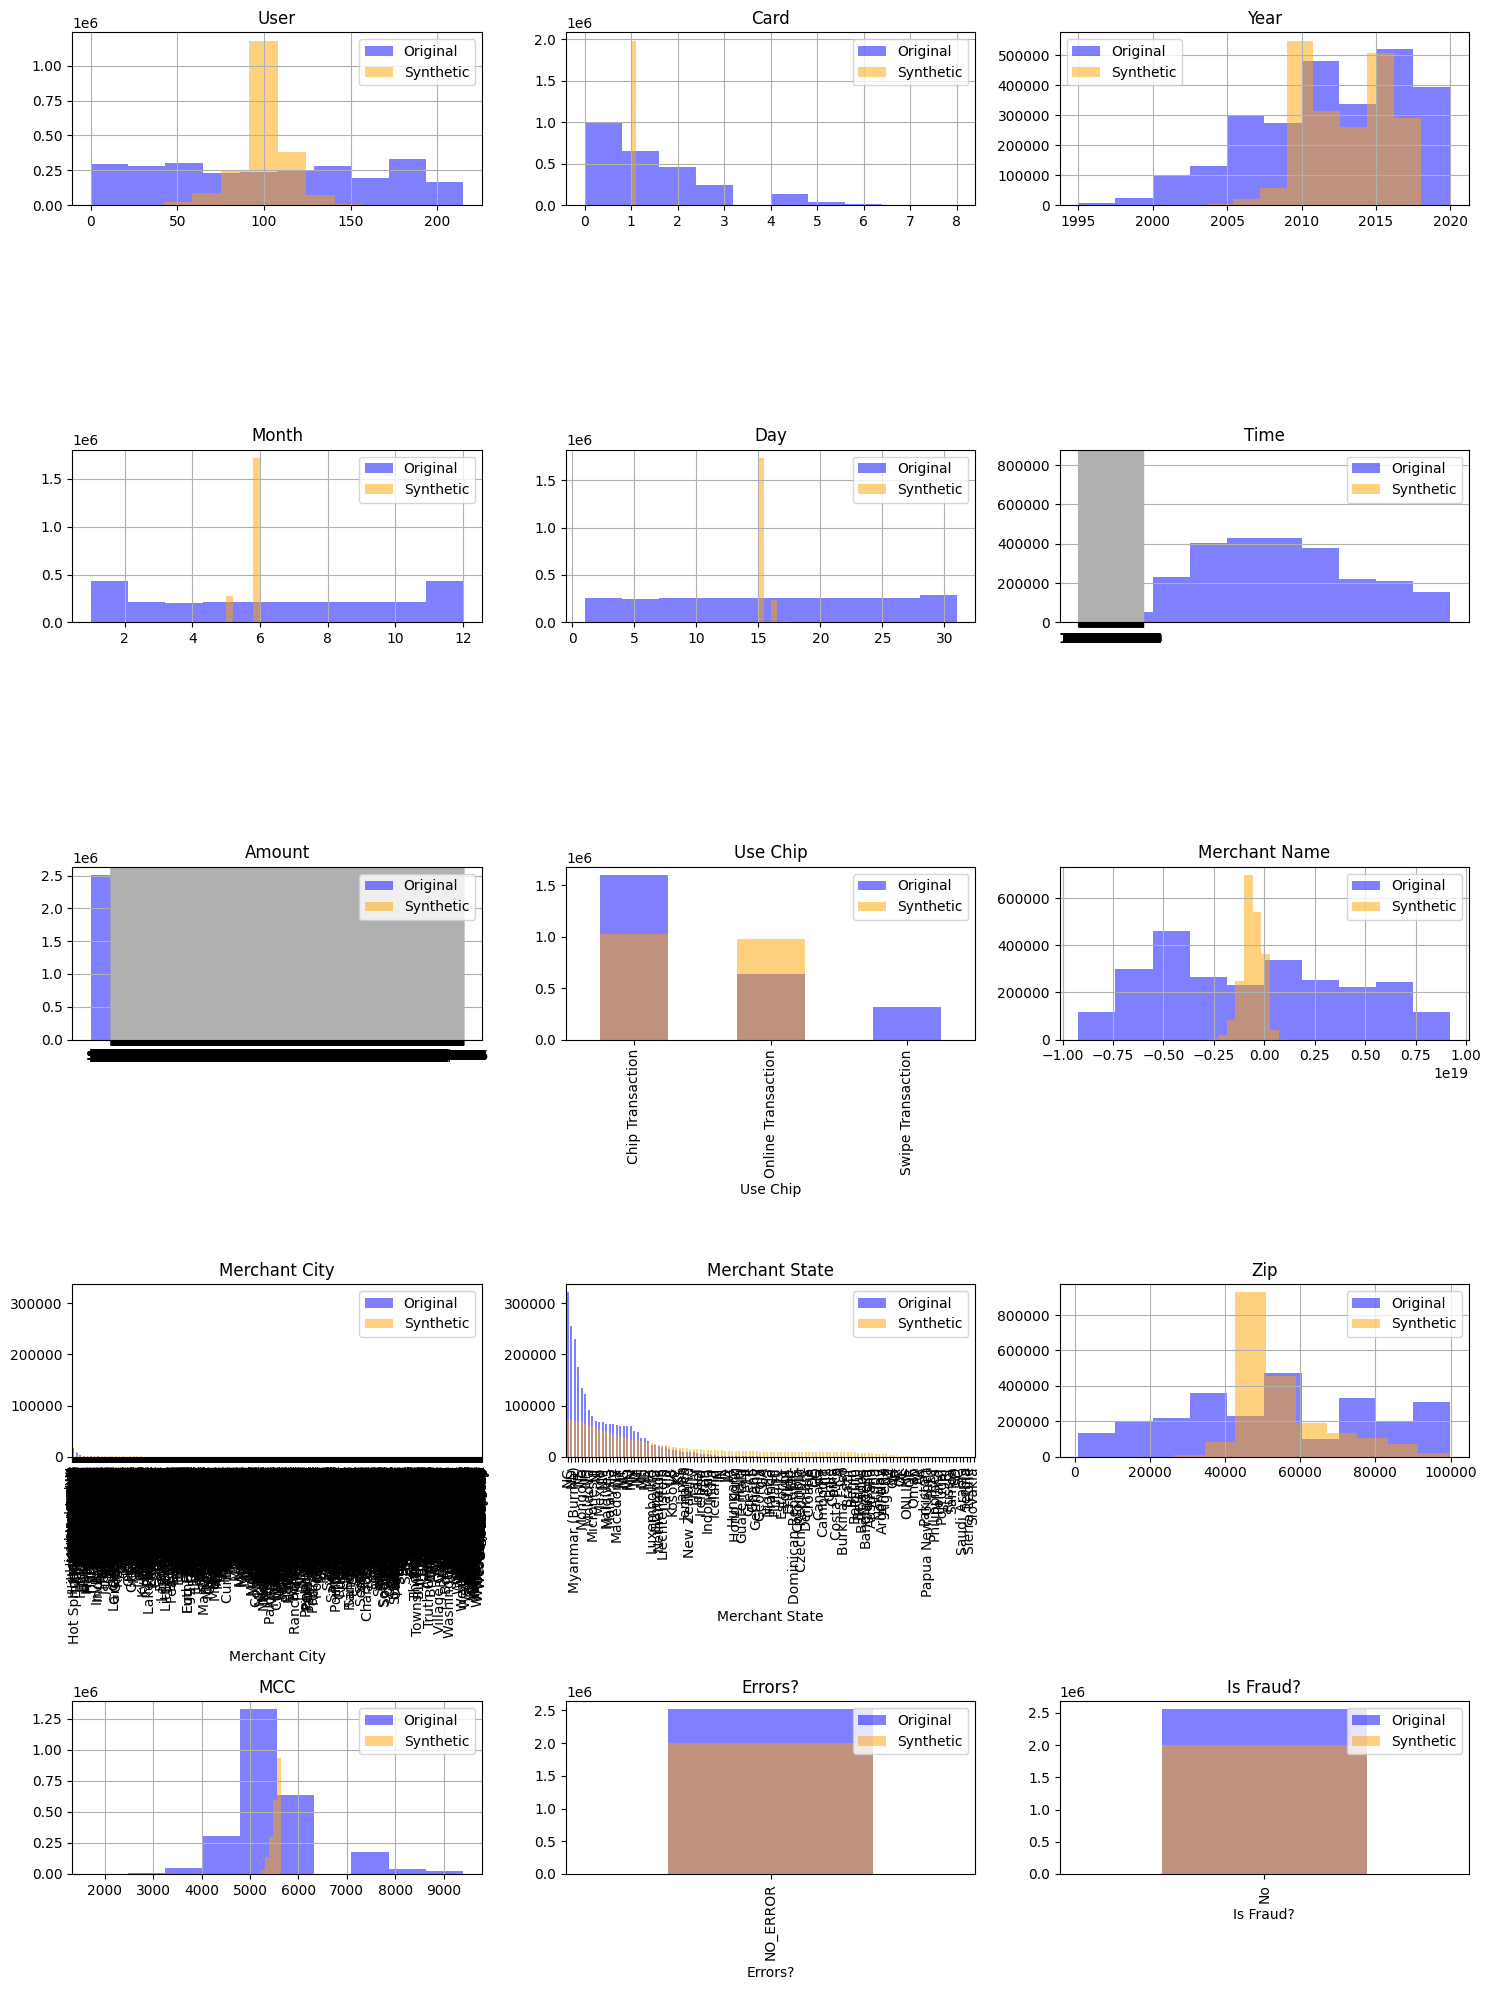

In [94]:

# Plot distributions of each column
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))

# Flatten the axs array to easily iterate over it
axs = axs.flatten()

# Iterate over columns and plot their distributions
for i, column in enumerate(data_original.columns):
    if data_original[column].dtype == 'object':
        # Categorical column, plot bar plots
        data_original[column].value_counts().plot(kind='bar', ax=axs[i], alpha=0.5, color='blue', label='Original')
        synthetic_data_df[column].value_counts().plot(kind='bar', ax=axs[i], alpha=0.5, color='orange', label='Synthetic')
    else:
        # Numeric column, plot histograms
        data_original[column].hist(ax=axs[i], alpha=0.5, color='blue', label='Original')
        synthetic_data_df[column].hist(ax=axs[i], alpha=0.5, color='orange', label='Synthetic')
    axs[i].set_title(column)
    axs[i].legend()

plt.tight_layout()
plt.show()


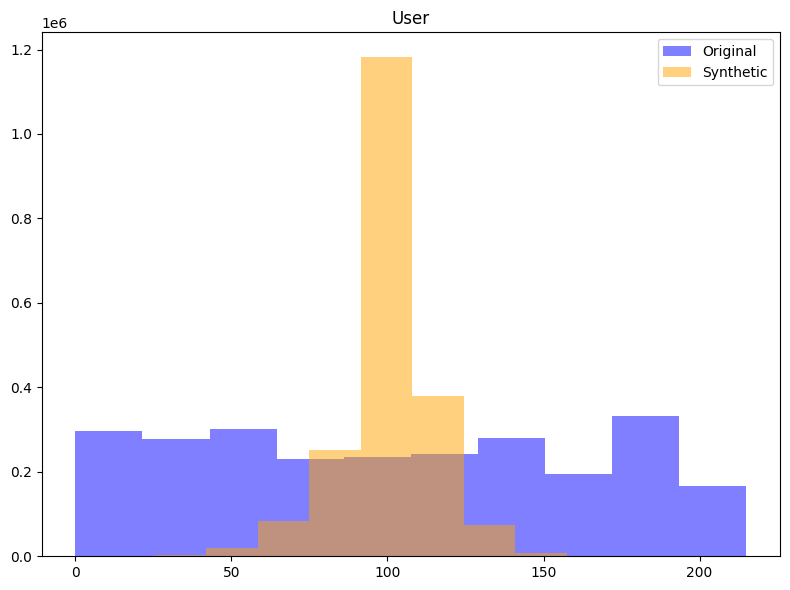

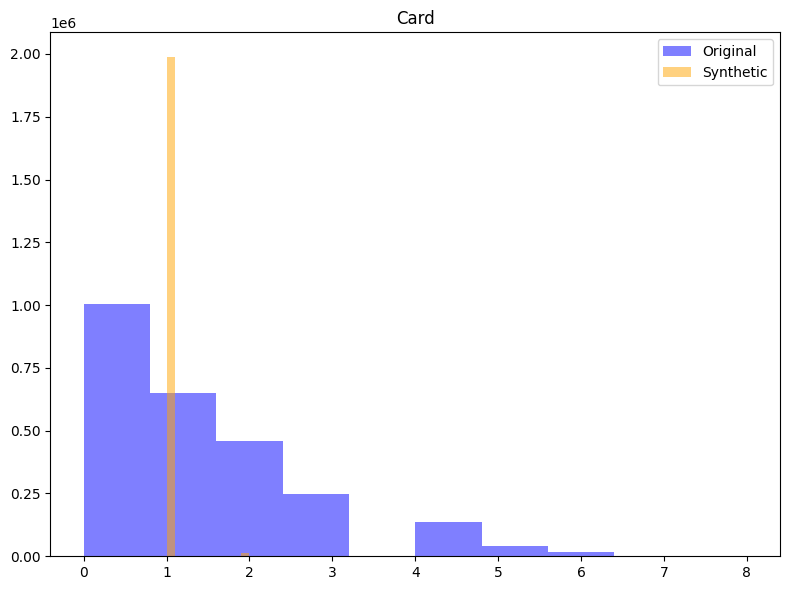

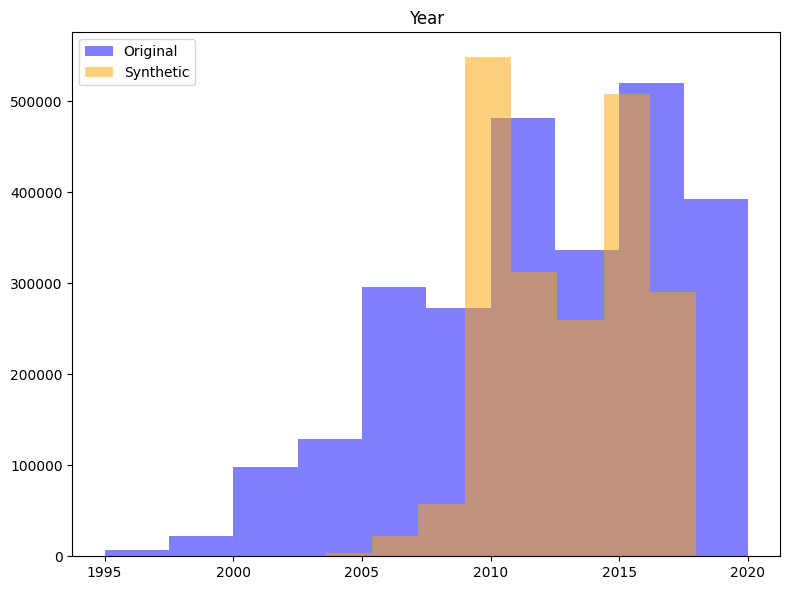

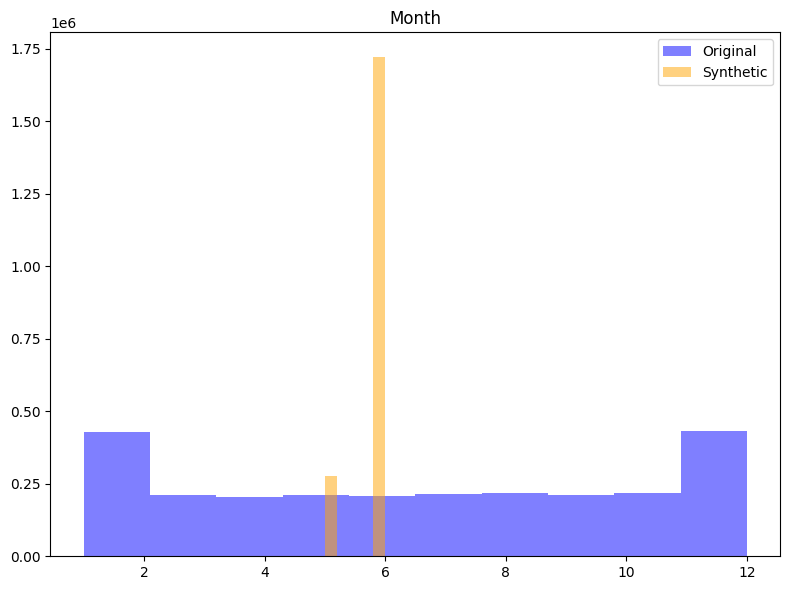

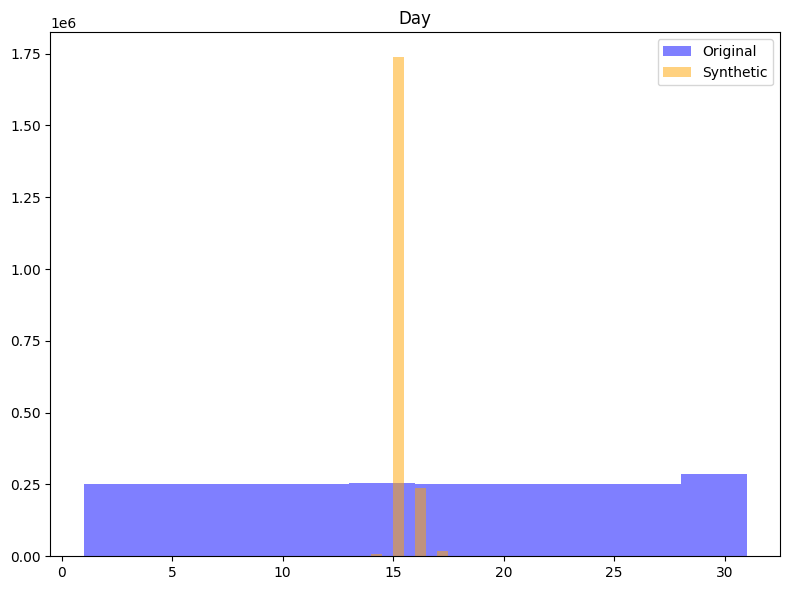

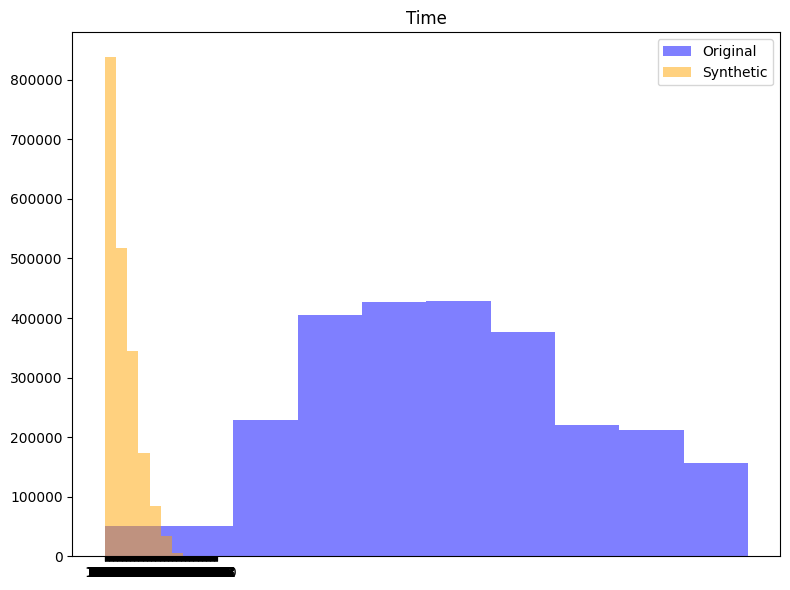

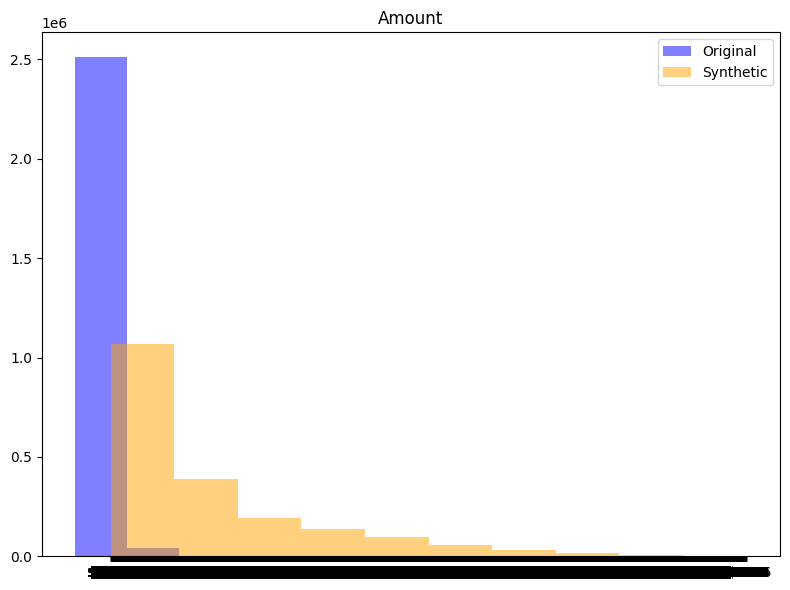

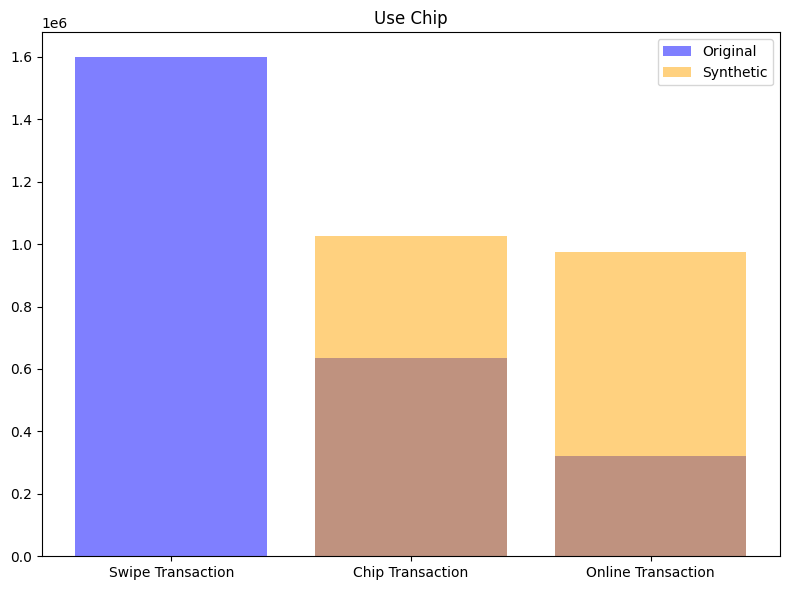

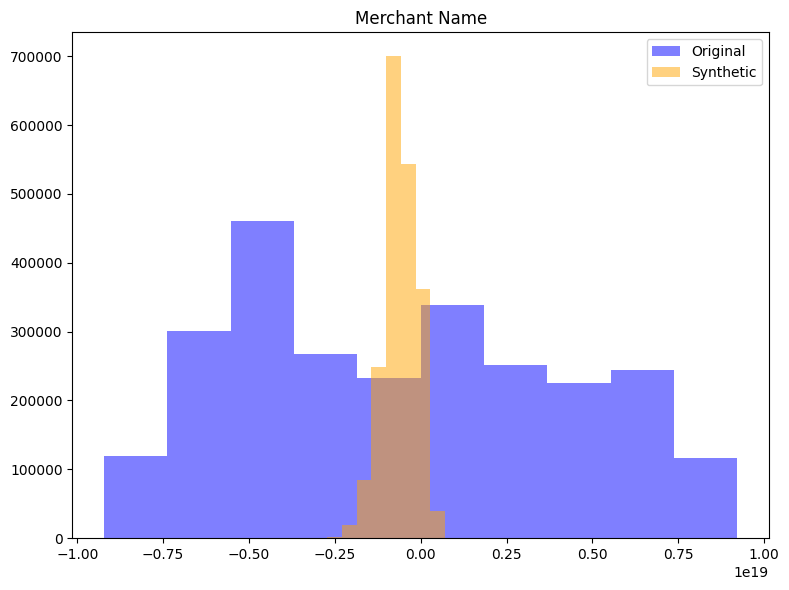

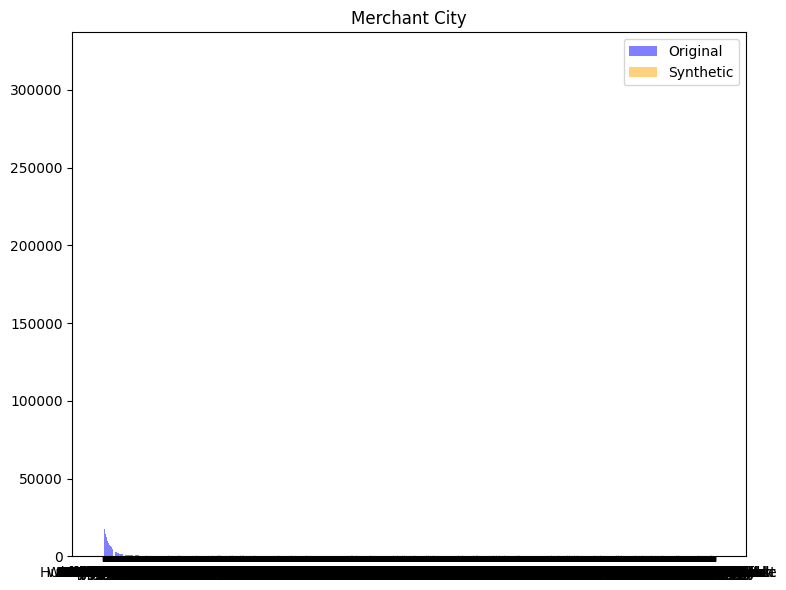

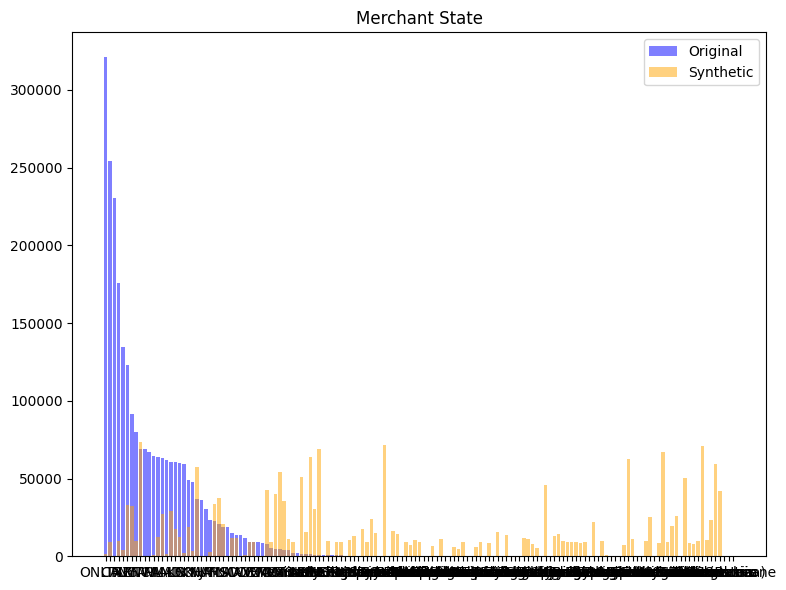

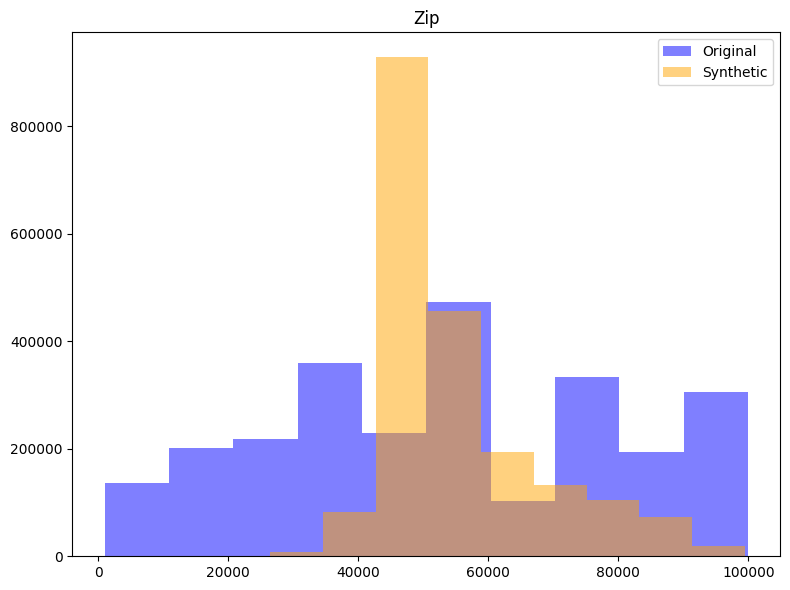

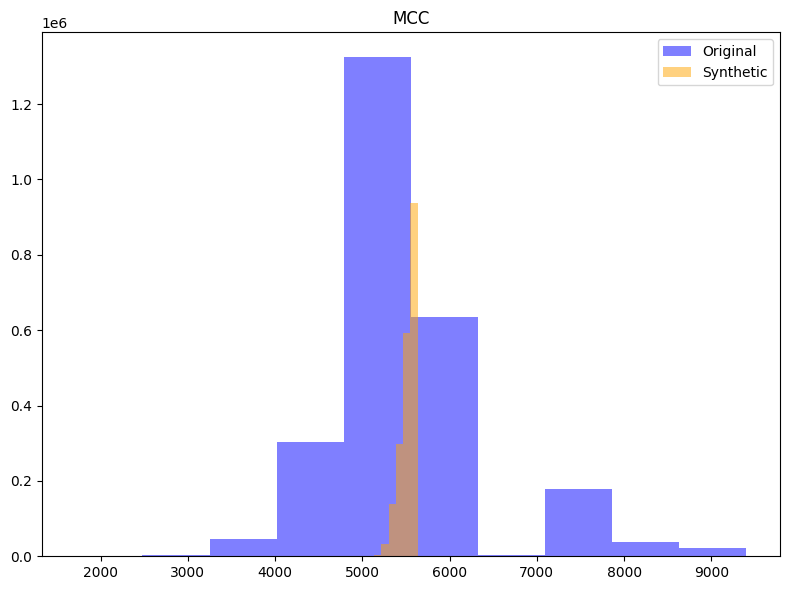

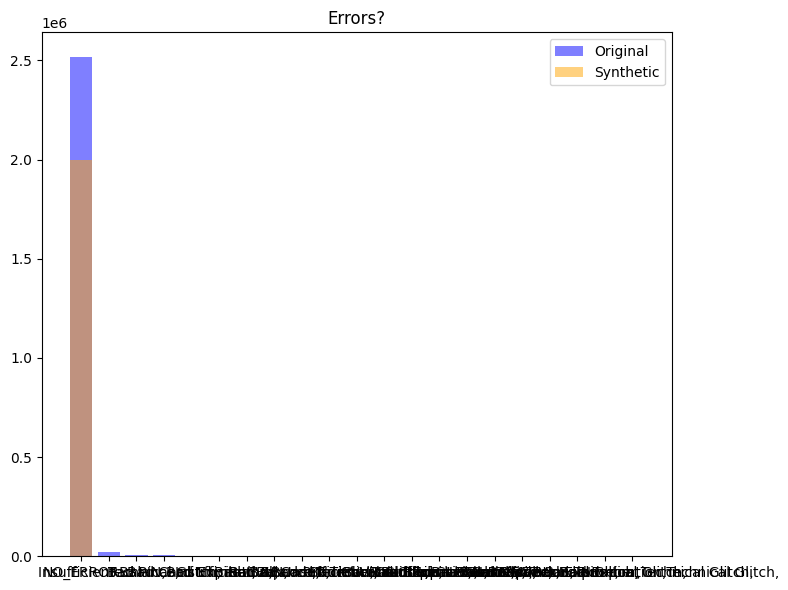

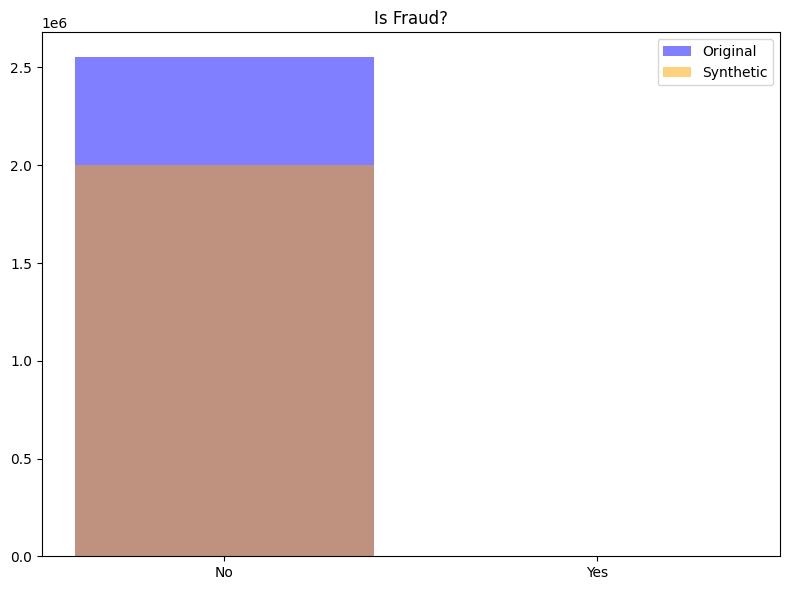

In [101]:
import matplotlib.pyplot as plt

# Plot distributions of each column individually
for column in data_original.columns:
    plt.figure(figsize=(8, 6))
    if data_original[column].dtype == 'object':
        # Categorical column, plot bar plots
        plt.bar(data_original[column].value_counts().index, data_original[column].value_counts(), alpha=0.5, color='blue', label='Original')
        plt.bar(synthetic_data_df[column].value_counts().index, synthetic_data_df[column].value_counts(), alpha=0.5, color='orange', label='Synthetic')
    else:
        # Numeric column, plot histograms
        plt.hist(data_original[column], alpha=0.5, color='blue', label='Original')
        plt.hist(synthetic_data_df[column], alpha=0.5, color='orange', label='Synthetic')
    plt.title(column)
    plt.legend()
    plt.tight_layout()
    plt.show()


**Graph summary:**



*   **Consistency in Distribution:** The analysis shows that most of the generated data looks very similar to the original data. This means that the process used to create the new data did a good job of copying how the original data was spread out.

*   **Identification of Deviating Columns:** But in a few cases, we noticed that the new data doesn't match up exactly with the original data. This could mean that the new data might not be completely accurate in those specific areas. One of the example is conversion of time does not exactly match the original distribution. Using some other method for time column can better fit the model.

In [95]:
num_duplicates_synthetic = synthetic_data_df.duplicated().sum()

print("Number of duplicate rows in synthetic data:", num_duplicates_synthetic)

Number of duplicate rows in synthetic data: 0


In [97]:
# Count duplicate rows that are exact copies of any row from original data
num_exact_copies = synthetic_data_df.isin(data_original).all(axis=1).sum()

print("Number of rows in synthetic data that are exact copies of any row from original data:", num_exact_copies)

Number of rows in synthetic data that are exact copies of any row from original data: 0


**Metrics summary:**



*   Here, we have found that the number of duplicate entries in the generated data is equal to zero.
*   Also, none of the sample of generated data is same as any sample of the original data.  



END